In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv('Manhattan12.csv')

In [3]:
data.head()

,Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\r\nMENT\r\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\r\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [4]:
data.shape

(27399, 21)

## Rename incorrectly formatted column names

In [5]:
# Remove Top 4 rows of description
df = data[4:-1]
df.columns = data.iloc[3]
df.reset_index(drop=True, inplace = True)
# Removing ' ', '\n' 
updated_column_names = []
for column in df.columns:
    column = column.replace(" ", "_").replace("\n","").replace("\r","")
    updated_column_names.append(column)
df.columns = updated_column_names
print(df.columns)

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENTNUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALEPRICE', 'SALE_DATE'],
      dtype='object')


In [6]:
df.columns



Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENTNUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALEPRICE', 'SALE_DATE'],
      dtype='object')

### Dropping the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'

In [7]:
df = df.drop(['BOROUGH', 'EASE-MENT', 'APARTMENTNUMBER'], axis=1)



### For each numerical column, remove the , the 'dollar' for the sale price, and then convert them to numeric.

In [8]:
num_columns = ['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALEPRICE', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE']
cat_columns = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'BUILDING_CLASS_AT_TIME_OF_SALE']
for column in num_columns:
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)

In [9]:
df[num_columns] = df[num_columns].astype(float)

### Create list of categorical variables and another for the numerical variables¶

In [10]:
cat_list = list(df.select_dtypes(include=['object']).columns)
num_list = list(df.select_dtypes(include=['int', 'float']).columns)


In [11]:
cat_list


['NEIGHBORHOOD',
 'BUILDING_CLASS_CATEGORY',
 'TAX_CLASS_AT_PRESENT',
 'BUILDING_CLASS_AT_PRESENT',
 'ADDRESS',
 'BUILDING_CLASS_AT_TIME_OF_SALE',
 'SALE_DATE']

In [12]:
num_list

['BLOCK',
 'LOT',
 'ZIP_CODE',
 'RESIDENTIAL_UNITS',
 'COMMERCIAL_UNITS',
 'TOTAL_UNITS',
 'LAND_SQUARE_FEET',
 'GROSS_SQUARE_FEET',
 'YEAR_BUILT',
 'TAX_CLASS_AT_TIME_OF_SALE',
 'SALEPRICE']

### Convert SALE DATE to datetime datatype¶

In [13]:
df.SALE_DATE = pd.to_datetime(df['SALE_DATE'], format='%d/%m/%Y')

In [14]:
print(df['SALE_DATE'].dtype)

datetime64[ns]


### For each categorical variable, remove the spaces, and then replace the empty string '' by NaN

In [15]:
df[cat_list] = df[cat_list].applymap(lambda x: x.strip() if isinstance(x, str) else x)
df[cat_list] = df[cat_list].replace('', pd.NA)

### Replace the zeros in Prices, Land squares, etc. by NaN

In [16]:
df[num_columns] = df[num_columns].replace(0, pd.NA)

### Show a summary of all missing values as well as the summary statistics

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27394 entries, 0 to 27393
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    27377 non-null  object        
 1   BUILDING_CLASS_CATEGORY         23940 non-null  object        
 2   TAX_CLASS_AT_PRESENT            27251 non-null  object        
 3   BLOCK                           27394 non-null  float64       
 4   LOT                             27394 non-null  float64       
 5   BUILDING_CLASS_AT_PRESENT       27251 non-null  object        
 6   ADDRESS                         27394 non-null  object        
 7   ZIP_CODE                        27393 non-null  object        
 8   RESIDENTIAL_UNITS               11023 non-null  object        
 9   COMMERCIAL_UNITS                3433 non-null   object        
 10  TOTAL_UNITS                     17691 non-null  object        
 11  LA

In [18]:
df.describe()

,BLOCK,LOT,TAX_CLASS_AT_TIME_OF_SALE
count,27394.000000,27394.000000,27394.000000
mean,1109.627656,741.813390,2.488063
std,465.958098,819.427506,0.891692
min,7.000000,1.000000,1.000000
25%,877.000000,37.000000,2.000000
50%,1047.000000,1007.000000,2.000000
75%,1411.000000,1233.000000,4.000000
max,2250.000000,9117.000000,4.000000


### dropping duplicates

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(25801, 18)

### dropping rows with NaN

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape


(470, 18)

### identify and remove outliers if any and showing shape

In [23]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

In [24]:
df.shape


(467, 18)

### Consider the log of the prices and normalise the data

In [25]:
df['SALEPRICE'] = np.log(df['SALEPRICE'].astype('float64'))

### Creating Neighborhood vs Price scatter plot visualization

In [26]:
short_names = {}
for value in df['NEIGHBORHOOD'].unique():
    short_name = value[0]
    short_names[value] = short_name

df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].replace(short_names)


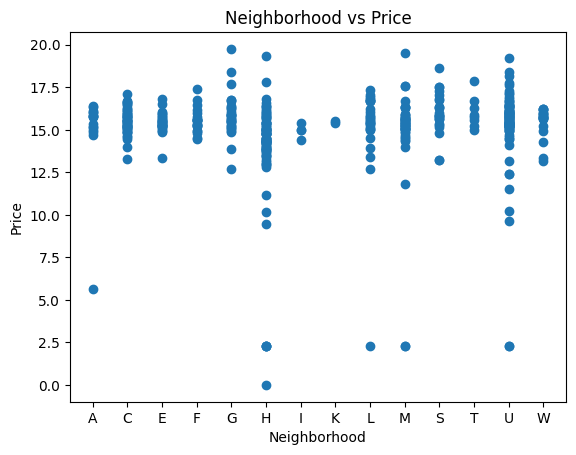

<Figure size 1500x1500 with 0 Axes>

In [27]:
plt.scatter(df['NEIGHBORHOOD'], df['SALEPRICE'])
plt.title('Neighborhood vs Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.figure(figsize=(15,15))
plt.show()

### Creating SALE PRICE vs SALE DATE visualization

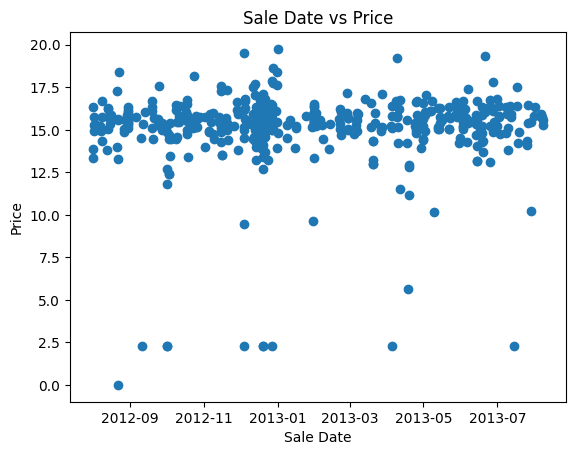

<Figure size 1500x1500 with 0 Axes>

In [28]:
plt.scatter(df['SALE_DATE'], df['SALEPRICE'])
plt.title('Sale Date vs Price')
plt.xlabel('Sale Date')
plt.ylabel('Price')
plt.figure(figsize=(15,15))
plt.show()